# Multilayer Perceptron (MLP)

## Introduction

![SNOWFALL](MLP_illus.png)

**Weight Notation**
$$
W_{ij}^{[l]}
$$

$$
i \text{: index of the output neuron (destination)}
$$

$$
j \text{: index of the input neuron (source)}
$$

$$
[l] \text{: layer number}
$$

$$
\text{Example: } W_{12}^{[1]} \text{: the weight connecting input neuron 2 to hidden layer neuron 1 in layer 1}
$$

---

**Activation & Weighted Sum Notation**
$$
Z_j^{[l]} \text{ and } a_j^{[l]}
$$

$$
j \text{: index of the neuron in the current layer}
$$

$$
[l] \text{: layer number}
$$

$$
Z_j^{[l]} \text{: linear combination (before activation function)}
$$

$$
a_j^{[l]} \text{: activated output (after activation function)}
$$

$$
\text{Example: } Z_1^{[1]} \text{: the linear combination for neuron 1 in layer 1}
$$

**Mathematical Relationship**

$$
Z_j^{[l]} = \sum_{i} W_{ji}^{[l]} \cdot a_i^{[l-1]} + b_j^{[l]}
$$

$$
a_j^{[l]} = \sigma(Z_j^{[l]})
$$

$$
\text{where } \sigma \text{ is the activation function and } b_j^{[l]} \text{ is the bias term}
$$

---
# Just 2 layers
## Vectorisation

$$
X = \begin{bmatrix}
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
x_2^{(1)} & x_2^{(2)} & \cdots & x_2^{(m)}
\end{bmatrix} \in \mathbb{R}^{n^{[0]} \times m}
$$

$$
y = \begin{bmatrix} y^{(1)} & \cdots & y^{(m)} \end{bmatrix} \in \mathbb{R}^{1 \times m}
$$



$$
Z^{[1]} = \begin{bmatrix}
w_{11}^{[1]} & w_{12}^{[1]} \\
w_{21}^{[1]} & w_{22}^{[1]} \\
w_{31}^{[1]} & w_{32}^{[1]}
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
x_2^{(1)} & x_2^{(2)} & \cdots & x_2^{(m)}
\end{bmatrix}
+
\begin{bmatrix}
b_1^{[1]} \\
b_2^{[1]} \\
b_3^{[1]}
\end{bmatrix}=
\begin{bmatrix}
z_1^{[1](1)} & z_1^{[1](2)} & \cdots & z_1^{[1](m)} \\
z_2^{[1](1)} & z_2^{[1](2)} & \cdots & z_2^{[1](m)} \\
z_3^{[1](1)} & z_3^{[1](2)} & \cdots & z_3^{[1](m)}
\end{bmatrix}=
W^{[1]} \cdot X + b^{[1]} \\ \\
$$

$$
A^{[1]} = \frac{1}{1 + e^{-Z^{[1]}}} = \begin{bmatrix}
a_1^{[1](1)} & a_1^{[1](2)} & \cdots & a_1^{[1](m)} \\
a_1^{[1](1)} & a_1^{[1](2)} & \cdots & a_1^{[1](m)} \\
a_3^{[1](1)} & a_3^{[1](2)} & \cdots & a_3^{[1](m)}
\end{bmatrix} \\
A^{[1]} \in \mathbb{R}^{3 \times m} \\ \\
$$
$$
Z^{[2]} = W^{[2]} \cdot A^{[1]} + b^{[2]} \\ \\
$$
$$
A^{[2]} = \frac{1}{1 + e^{-Z^{[2]}}} \\ \\
$$


Where

$$
W^{[1]} \in \mathbb{R}^{n^{[1]} \times n^{[0]}} \quad W^{[2]} \in \mathbb{R}^{n^{[2]} \times n^{[1]}}
$$

$$
b^{[1]} \in \mathbb{R}^{n^{[1]} \times 1} \quad b^{[2]} \in \mathbb{R}^{n^{[2]} \times 1}
$$

$$
Z^{[1]}, A^{[1]} \in \mathbb{R}^{n^{[1]} \times m} \quad Z^{[2]}, A^{[2]} \in \mathbb{R}^{n^{[2]} \times m}
$$

$$
\begin{array}{l}
n^{[0]} \text{ : number of inputs} \\
n^{[1]} \text{ : number of neurons in layer 1} \\
n^{[2]} \text{ : number of neurons in layer 2} \\
m \text{ : number of data points}
\end{array}
$$

---

We will work here with only **two** layers but it will be easy to add others like

$$
Z^{[3]} = W^{[3]} \cdot A^{[2]} + b^{[3]} 
$$
$$
...
$$

---

### Back Propagation

**Cost function**
$$
\mathcal{L} = -\frac{1}{m} \sum \left[ y \log A^{[2]} + \left(1 - y\right) \log \left(1 - A^{[2]}\right) \right]
$$

---

**Gradients**
$$
\frac{\partial \mathcal{L}}{\partial W^{[2]}} = \frac{\partial \mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial W^{[2]}}
$$

$$
\frac{\partial \mathcal{L}}{\partial b^{[2]}} = \frac{\partial \mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial b^{[2]}}
$$

$$
\frac{\partial \mathcal{L}}{\partial W^{[1]}} = \frac{\partial \mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial A^{[1]}} \times \frac{\partial A^{[1]}}{\partial Z^{[1]}} \times \frac{\partial Z^{[1]}}{\partial W^{[1]}}
$$

$$
\frac{\partial \mathcal{L}}{\partial b^{[1]}} = \frac{\partial \mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial A^{[1]}} \times \frac{\partial A^{[1]}}{\partial Z^{[1]}} \times \frac{\partial Z^{[1]}}{\partial b^{[1]}}
$$

We simplify by replacing the repeating terms with a notation

$$
\boxed{dZ2 = \frac{\partial \mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}}}
$$

$$
\frac{\partial \mathcal{L}}{\partial W^{[2]}} = dZ2 \times \frac{\partial Z^{[2]}}{\partial W^{[2]}}
$$

$$
\frac{\partial \mathcal{L}}{\partial b^{[2]}} = dZ2 \times \frac{\partial Z^{[2]}}{\partial b^{[2]}}
$$

$$
\boxed{dZ1 = dZ2 \times \frac{\partial Z^{[2]}}{\partial A^{[1]}} \times \frac{\partial A^{[1]}}{\partial Z^{[1]}}}
$$

$$
\frac{\partial \mathcal{L}}{\partial W^{[1]}} = dZ1 \times \frac{\partial Z^{[1]}}{\partial W^{[1]}}
$$

$$
\frac{\partial \mathcal{L}}{\partial b^{[1]}} = dZ1 \times \frac{\partial Z^{[1]}}{\partial b^{[1]}}
$$

after calculate the gradients we got (basic calculus and then Vetorisation)

$$
dZ2 = (A^{[2]} - y)
$$

$$
\frac{\partial \mathcal{L}}{\partial W^{[2]}} = \frac{1}{M} dZ2 \cdot A^{[1]^T}
$$

$$
\frac{\partial \mathcal{L}}{\partial b^{[2]}} = \frac{1}{M} \sum_{for-each-row} dZ2
$$

$$
dZ1 = W^{[2]^T} \cdot dZ2 \times A^{[1]}(1-A^{[1]})
$$

$$
\frac{\partial \mathcal{L}}{\partial W^{[1]}} = \frac{1}{M} dZ1 \cdot X^T
$$

$$
\frac{\partial \mathcal{L}}{\partial b^{[1]}} = \frac{1}{M} \sum_{for-each-row} dZ1
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

In [3]:
def forward_propa(X,W1,W2,b1,b2):
    Z1 = np.dot(W1,X) +  b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2  
    A2 = sigmoid(Z2)

    return Z1 , A1 , Z2 ,A2
    

In [4]:
def back_propa(Z1,A1,Z2,A2,W2,W1,X,y):
    m =  y.shape[1]
    
    dZ2 = A2 - y
    dZ1 = np.dot(W2.T,dZ2) * (A1 * (1 - A1))
    
    gradW1 = (1/m) * (np.dot(dZ1,X.T))
    gradb1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
                      
    gradW2 = (1/m) * (np.dot(dZ2,A1.T))
    gradb2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)


    return gradW1 , gradb1 , gradW2 , gradb2



In [5]:
def Loss(A2,y):
    m = y.shape[1]
    l = - (1/m) * np.sum(y*np.log(A2) + (1-y) * np.log(1 - A2))
    return l

In [6]:
def train (X,y,epochs = 100, learning_rate = 0.001):
    # number of neuron in each layer 0:input   2: output
    n0 = 2; n1 = 3; n2 = 1
    # Initialiser W,b
    W1 = np.random.randn(n1, n0)
    W2 = np.random.randn(n2, n1) 
    b1 = np.zeros((n1, 1))
    b2 = np.zeros((n2, 1))
    for i in range(epochs):
        # forward
        Z1 , A1 , Z2 ,A2 = forward_propa(X,W1,W2,b1,b2)
        # Back
        gradW1 , gradb1 , gradW2 , gradb2 = back_propa(Z1,A1,Z2,A2,W2,W1,X,y)
    
        # Update
        W1 = W1 - learning_rate * gradW1
        W2 = W2 - learning_rate * gradW2
        b1 = b1 - learning_rate * gradb1
        b2 = b2 - learning_rate * gradb2
        
        # Loss
        loss = Loss(A2,y)
        print(f"Epoch {i} ==> Loss: {loss:.8f}")
    return W1 , W2 , b1 ,b2

In [7]:
# create a small data
from sklearn.datasets import make_circles

X,y = make_circles(300,noise=.1, random_state=0, factor=.5)

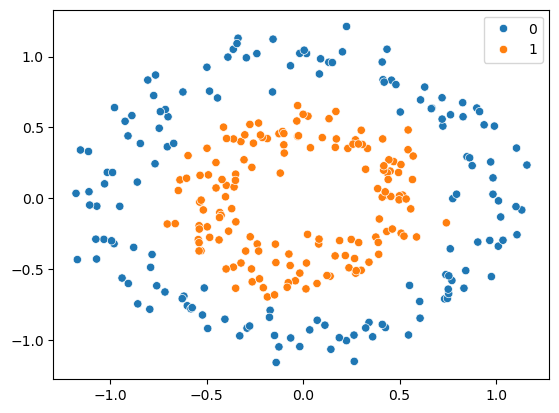

In [8]:
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [9]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [10]:
y = y.reshape(len(y),1)

In [11]:
print(X.T.shape)
print(y.T.shape)

(2, 300)
(1, 300)


In [12]:
print(X.shape)
W1 , W2 , b1 ,b2 = train (X.T,y.T,epochs = 5000, learning_rate = 1)

(300, 2)
Epoch 0 ==> Loss: 0.79794467
Epoch 1 ==> Loss: 0.72856883
Epoch 2 ==> Loss: 0.70494500
Epoch 3 ==> Loss: 0.69743426
Epoch 4 ==> Loss: 0.69507317
Epoch 5 ==> Loss: 0.69431705
Epoch 6 ==> Loss: 0.69406015
Epoch 7 ==> Loss: 0.69395921
Epoch 8 ==> Loss: 0.69390744
Epoch 9 ==> Loss: 0.69387149
Epoch 10 ==> Loss: 0.69384091
Epoch 11 ==> Loss: 0.69381241
Epoch 12 ==> Loss: 0.69378493
Epoch 13 ==> Loss: 0.69375814
Epoch 14 ==> Loss: 0.69373192
Epoch 15 ==> Loss: 0.69370619
Epoch 16 ==> Loss: 0.69368095
Epoch 17 ==> Loss: 0.69365617
Epoch 18 ==> Loss: 0.69363181
Epoch 19 ==> Loss: 0.69360788
Epoch 20 ==> Loss: 0.69358434
Epoch 21 ==> Loss: 0.69356119
Epoch 22 ==> Loss: 0.69353840
Epoch 23 ==> Loss: 0.69351597
Epoch 24 ==> Loss: 0.69349387
Epoch 25 ==> Loss: 0.69347209
Epoch 26 ==> Loss: 0.69345061
Epoch 27 ==> Loss: 0.69342943
Epoch 28 ==> Loss: 0.69340853
Epoch 29 ==> Loss: 0.69338790
Epoch 30 ==> Loss: 0.69336752
Epoch 31 ==> Loss: 0.69334739
Epoch 32 ==> Loss: 0.69332748
Epoch 33 ==

In [13]:
def predict(X,W1,W2,b1,b2):
    Z1 , A1 , Z2 ,A2 = forward_propa(X,W1,W2,b1,b2)

    return A2

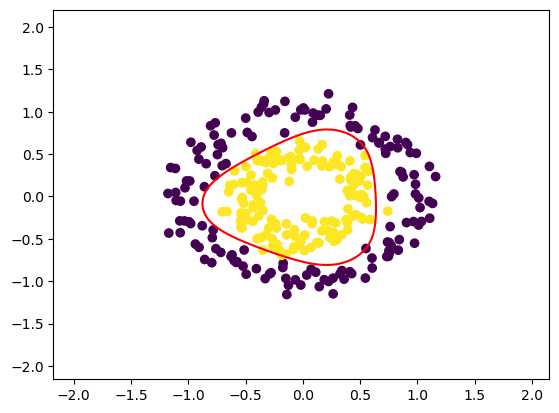

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, W1, W2, b1, b2, resolution=0.01):
    """
    FIND the boudary numerically
    """
    # Create a grid of points
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Flatten grid and create input matrix
    grid_points = np.c_[xx.ravel(), yy.ravel()].T 
    
    # Forward pass on the grid points
    Z = predict(grid_points, W1, W2, b1, b2)
    
    Z = Z.reshape(xx.shape) 
    
    # Plot contour where output = 0.5
    plt.contour(xx, yy, Z, levels=[0.5], colors='red')
    
    # Plot original data points
    plt.scatter(X[0, :], X[1, :], c=y.flatten())
    plt.show()

plot_decision_boundary(X.T, y, W1, W2, b1, b2)


In [15]:
# Let's test it
X_test = np.array([[0,0],
                   [0,-1],
                   [1,0.5],
                   [-0.5,0],
                   [0.6,-0.4]])

pred = predict(X_test.T, W1, W2, b1, b2)

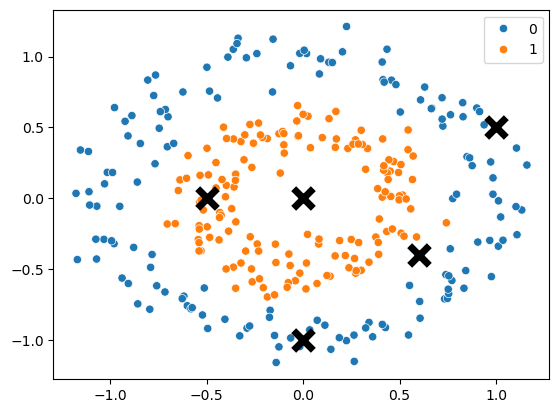

In [16]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y.flatten())
plt.scatter(X_test[:,0], X_test[:,1], c="black", s=200, marker="x", linewidths=5)

In [17]:
pred_list = list(pred.flatten())

In [18]:
pred_label_prob = [ [1, np.round(i*100,2)] if i > 0.5  else [0,np.round((1 - i)*100,2)] for i in pred_list]

In [19]:
pred_label_prob

[[1, 100.0], [0, 97.42], [0, 98.3], [1, 99.9], [1, 61.27]]

# Generalised MLP

Now let's generalise for x layers with x neurons


**Dimenisons of Weights matrix and biais**
$$W^{[l]} \in \mathbb{R}^{n^{[l]} \times n^{[l-1]}}$$
$$b^{[l]} \in \mathbb{R}^{n^{[l]} \times 1}$$

$l$ : the number of the layer

---
**Forward Propagation**
$$Z^{[l]} = W^{[l]} \cdot A^{[l-1]} + b^{[l]}$$
$$A^{[l]} = \frac{1}{1 + e^{-Z^{[l]}}}$$
with$$A^{[0]} = X$$

---
**Back Propagation**

$$dZ^{[output\_layer]} = A^{[output\_layer]} - y$$
$$\frac{\partial \mathcal{L}}{\partial W^{[l]}} = \frac{1}{m} \times dZ^{[l]} \cdot A^{[l-1]^T}$$
$$\frac{\partial \mathcal{L}}{\partial b^{[l]}} = \frac{1}{m} \sum_{axe1} dZ^{[l]}$$
$$dZ^{[l-1]} = W^{[l]^T} \cdot dZ^{[l]} \times A^{[l-1]}(1 - A^{[l-1]})$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

In [22]:
# Dimensions is a list that give idea about the neurons in each layer
# with the first one is the input and the last is the output
# dimensions=[n0 = 2, n1= 5, n2 = 10, n3 = 1]
def initialisation(dimensions):
    """
    Return the Weights and bias
    """
    Weights = []
    bias = []
    for i in range(len(dimensions)-1):
        Weights.append(np.random.randn(dimensions[i+1], dimensions[i]))
        bias.append(np.zeros((dimensions[i+1], 1)))

    return Weights , bias

In [23]:
weight, b = initialisation([2,3,4,1])
print(len(weight))
print(len(b))

3
3


In [24]:
def forward_propa(X,Weights,bias):
    
    Z = []
    A = []
    
    z_1 = np.dot(Weights[0],X) +  bias[0]
    Z.append(z_1)
    A.append(sigmoid(z_1))
    
    for i in range(1,len(Weights)):
        z = np.dot(Weights[i],A[i-1]) +  bias[i]
        Z.append(z)
        A.append(sigmoid(z))
        
    return Z,A
    

In [25]:
def back_propa(Z,A,Weights,X,y):

    m =  y.shape[1]
    
    # initialisation of dZ
    dZ = [0] * len(Weights)
    dZ_output = A[-1] - y
    dZ[-1] = dZ_output

    for i in reversed(range(len(Weights) - 1)):
        dZ[i] = np.dot(Weights[i+1].T,dZ[i+1]) * (A[i] * (1 - A[i]))

    gradW = []
    gradW.append((1/m) * (np.dot(dZ[0],X.T)))
    for i in range(1,len(Weights)):
        gradW.append( (1/m) * (np.dot(dZ[i],A[i-1].T)))

    gradb = []
    for i in range(len(Weights)):
        gradb.append((1/m) * np.sum(dZ[i], axis=1, keepdims=True))

    return gradW, gradb

In [26]:
def Loss(A,y):
    m = y.shape[1]
    l = - (1/m) * np.sum(y*np.log(A[-1]) + (1-y) * np.log(1 - A[-1]))
    return l

In [27]:
def train (X,y,dimensions,epochs = 100, learning_rate = 0.001):

    weights, b = initialisation(dimensions)

    for i in range(epochs):
        # forward
        Z, A = forward_propa(X,weights,b)
        # Back
        gradW , gradb = back_propa(Z,A,weights,X,y)
    
        # Update
        for i in range(len(weights)):
            weights[i] = weights[i] - learning_rate * gradW[i]
            b[i] = b[i] - learning_rate * gradb[i]
        # Loss
        loss = Loss(A,y)
        print(f"Epoch {i} ==> Loss: {loss:.8f}")
    return weights , b

In [28]:
# create a small data
from sklearn.datasets import make_moons

X,y = make_moons(300, noise=.15, random_state=0)

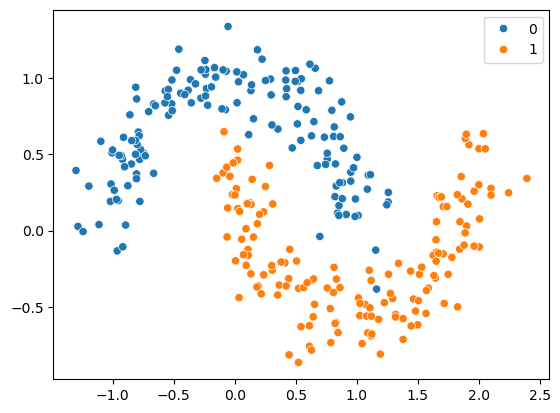

In [29]:
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [30]:
y = y.reshape(len(y),1)
W ,b = train (X.T,y.T,[2,5,3,1],epochs = 5000, learning_rate = 1)

Epoch 2 ==> Loss: 1.04726549
Epoch 2 ==> Loss: 0.80622880
Epoch 2 ==> Loss: 0.71550920
Epoch 2 ==> Loss: 0.68899248
Epoch 2 ==> Loss: 0.67947444
Epoch 2 ==> Loss: 0.67369142
Epoch 2 ==> Loss: 0.66868300
Epoch 2 ==> Loss: 0.66379992
Epoch 2 ==> Loss: 0.65887845
Epoch 2 ==> Loss: 0.65385796
Epoch 2 ==> Loss: 0.64870201
Epoch 2 ==> Loss: 0.64338205
Epoch 2 ==> Loss: 0.63787400
Epoch 2 ==> Loss: 0.63215753
Epoch 2 ==> Loss: 0.62621592
Epoch 2 ==> Loss: 0.62003618
Epoch 2 ==> Loss: 0.61360913
Epoch 2 ==> Loss: 0.60692958
Epoch 2 ==> Loss: 0.59999649
Epoch 2 ==> Loss: 0.59281316
Epoch 2 ==> Loss: 0.58538737
Epoch 2 ==> Loss: 0.57773146
Epoch 2 ==> Loss: 0.56986236
Epoch 2 ==> Loss: 0.56180152
Epoch 2 ==> Loss: 0.55357466
Epoch 2 ==> Loss: 0.54521147
Epoch 2 ==> Loss: 0.53674507
Epoch 2 ==> Loss: 0.52821135
Epoch 2 ==> Loss: 0.51964817
Epoch 2 ==> Loss: 0.51109450
Epoch 2 ==> Loss: 0.50258942
Epoch 2 ==> Loss: 0.49417116
Epoch 2 ==> Loss: 0.48587620
Epoch 2 ==> Loss: 0.47773844
Epoch 2 ==> Lo

In [31]:
def predict(X,Weights,bias):
    
    Z, A =forward_propa(X,Weights,bias)
        
    return A[-1]

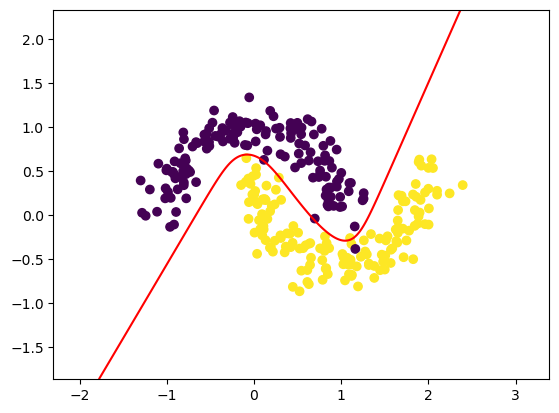

In [32]:
def plot_decision_boundary(X,Weights,bias, resolution=0.01):
    """
    FIND the boudary numerically
    """
    # Create a grid of points
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Flatten grid and create input matrix
    grid_points = np.c_[xx.ravel(), yy.ravel()].T 
    
    # Forward pass on the grid points
    Z = predict(grid_points,Weights,bias)
    
    Z = Z.reshape(xx.shape) 
    
    # Plot contour where output = 0.5
    plt.contour(xx, yy, Z, levels=[0.5], colors='red')
    
    # Plot original data points
    plt.scatter(X[0, :], X[1, :], c=y.flatten())
    plt.show()

plot_decision_boundary(X.T,W,b, resolution=0.01)